<a href="https://colab.research.google.com/github/cathrine36/Deep-Learning/blob/main/Fashion_MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)


2.4.0


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#metadata
#dataset

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFIPXHV/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFIPXHV/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [ ]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # normalize operation
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

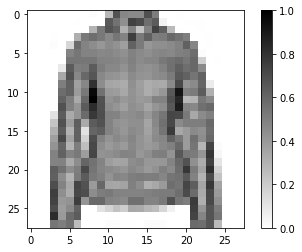

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Model Building

In [ ]:
print(28*28) #ip
print(784*128 + 128) # w_l0_l1 and bias tunable values
print(128*10+10) # w_l1_l2

784
100480
1290


In [ ]:
100480 +1290

101770

In [ ]:
## Define your model here

model=tf.keras.Sequential()



In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4583 - accuracy: 0.8319
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2937 - accuracy: 0.8943
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2534 - accuracy: 0.9066
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2236 - accuracy: 0.9176
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1965 - accuracy: 0.9257
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1780 - accuracy: 0.9337
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1550 - accuracy: 0.9422
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1420 - accuracy: 0.9466
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1257 - accuracy: 0.9534
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.111

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.5333 - accuracy: 0.8293
Accuracy on test dataset: 0.8292999863624573


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape
predictions[0]

array([9.0173897e-05, 6.3741427e-06, 4.0843412e-02, 1.1813953e-04,
       8.8307923e-01, 1.9826128e-26, 7.5862631e-02, 0.0000000e+00,
       5.0479163e-09, 6.3045952e-28], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
class_names[np.argmax(predictions[0])]

'Coat'